In [1]:
#load images in the repo
import cv2
colours = cv2.imread("colour_palette.jpg")
rgb = cv2.imread("rgbb.png")
fedal = cv2.imread("federernadal.jpg")

In [2]:
# importing OpenCV and urllib for downloading and displaying the bunny image
import urllib.request
bunny_image_url = "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/bunny.png"
urllib.request.urlretrieve(bunny_image_url, "bunny.png") # downloads file as "bunny.png"
im = cv2.imread("bunny.png")

In [3]:
# loading standard python modules
import os
import math
import matplotlib.pyplot as plt
%matplotlib inline

Original size of bunny's image is: 630 Kilo Bytes


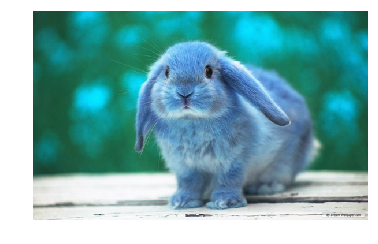

In [4]:
# We read a bunny image here and display it
img_corrected = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(im)
print("Original size of bunny's image is: {} Kilo Bytes".format(str(math.ceil((os.stat('bunny.png').st_size)/1000))))

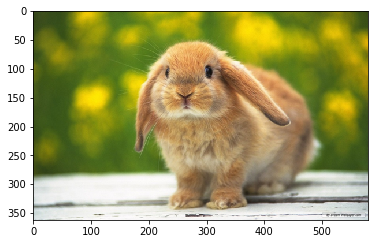

In [5]:
plt.imshow(img_corrected)

In [8]:
def get_img_size(img_name):
    return str(math.ceil((os.stat(img_name).st_size)/1000))

In [9]:
## Image Size of the Federer Nadal Image
get_img_size("federernadal.jpg")

'64'

In [10]:
row, column, depth = im.shape

### Notes:

* If the image is color:

   rows, columns, channels = image.shape


* If an image is grayscale:

    rows, columns = image.shape
    
*It is a good way to check if the loaded image is colored or in grayscale.*

In [12]:
row, column, depth

(362, 580, 3)

In [16]:
# testing
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
gray.shape

(362, 580)

## Pixels:
What is a pixel?

To form any visible color, we need the three primary colors (i.e Red, Green and Blue). Mixing these colors in various proportions provides us with all colors of the visible spectrum. Interpreting this in the computer's technology, each pixel is comprised of 3 channels - i.e. Red, Green and Blue. Each of these channels has an intensity value that ranges between 0 - 255. From combinatorics we know that the total number of colors we can represent in each pixel are 256 x 256 x 256. Since each channel in a pixel can have 256 = 2^8 possible values, each channel requires 8 bits of memory to store in computer memory. Thus, each pixel requires 8 + 8 + 8 = 24 bits of memory for storage

Now, let's focus on the bunny's image. The image has a total of 209960 pixels and since each pixel required 24 bits to store, the image has an original size of 209960 x 24 bits. Doing some math magic, in Kilo Bytes this is equal to ((209960 x 24) / 8) / 1000 ~ 630 Kilo Bytes

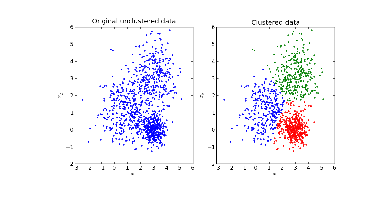

In [17]:
k_means_url = "http://i.stack.imgur.com/cIDB3.png"
urllib.request.urlretrieve(k_means_url, "K_Means_clustering.png") # downloads file as "K_Means_clustering.png"
k_means_im = cv2.imread("K_Means_clustering.png")
k_means_im_corrected = cv2.cvtColor(k_means_im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(k_means_im_corrected)

## Image Compression with K - Means clustering

Why Image Compression?

* to save space and save money on paid storage
* to save bandwidth and time of the computer network -> faster transmission


In [23]:
from sklearn.cluster import KMeans
import numpy as np
num_rows = im.shape[0]
num_cols = im.shape[1]
transformed_image_for_KMeans = im.reshape(num_rows * num_cols, 3)

In [24]:
num_rows, num_cols

(362, 580)

### Note:

im.reshape(num_rows * num_cols, 3) -> explanation
converts the RxCx3 image into a Kx3 matrix where K=RXC and each row is now a vector in the 3-D space of RGB.

In [25]:
transformed_image_for_KMeans.shape

(209960, 3)

In [26]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(transformed_image_for_KMeans)
cluster_centroids = np.asarray(kmeans.cluster_centers_,dtype=np.uint8)

In [31]:
# labels represent the label of each pixel and which cluster it belongs to
kmeans.labels_

array([5, 5, 5, ..., 3, 3, 3], dtype=int32)

In [27]:
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(num_rows,num_cols);    
compressed_image = np.ones((num_rows, num_cols, 3), dtype=np.uint8)
for r in range(num_rows):
    for c in range(num_cols):
        compressed_image[r, c, :] = cluster_centroids[labels[r, c], :]

Compressed size of bunny's image is: 48 Kilo Bytes


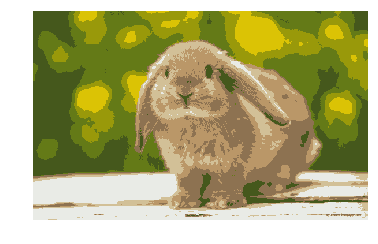

In [33]:
# cv2 ops to save and view the compressed image
cv2.imwrite("compressed_bunny.png", compressed_image)
compressed_bunny_im = cv2.imread("compressed_bunny.png")
compressed_bunny_im_corrected = cv2.cvtColor(compressed_bunny_im, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(compressed_bunny_im_corrected)    
print("Compressed size of bunny's image is: {} Kilo Bytes".format(str(math.ceil((os.stat('compressed_bunny.png').st_size)/1000))))

In [37]:
#Let's put this into a function:

def k_means_compress(img_filename, cv2_img_obj, n_clusters):
    print("Original size of the image is: {} KB".format(get_img_size(img_filename)))
    num_rows = cv2_img_obj.shape[0]
    num_cols = cv2_img_obj.shape[1]
    transformed_image_for_KMeans = cv2_img_obj.reshape(num_rows * num_cols, 3)
    print("Transformed image shape: {}".format(transformed_image_for_KMeans))
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(transformed_image_for_KMeans)
    cluster_centroids = np.asarray(kmeans.cluster_centers_,dtype=np.uint8)
    labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
    labels = labels.reshape(num_rows,num_cols);    
    compressed_image = np.ones((num_rows, num_cols, 3), dtype=np.uint8)
    for r in range(num_rows):
        for c in range(num_cols):
            compressed_image[r, c, :] = cluster_centroids[labels[r, c], :]
    compressed_img_filename = "compressed_" + img_filename
    cv2.imwrite(compressed_img_filename, compressed_image)
    compressed_im = cv2.imread(compressed_img_filename)
    compressed_im_corrected = cv2.cvtColor(compressed_im, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(compressed_im_corrected)    
    print("Compressed size of the image is: {} KB".format(get_img_size(compressed_img_filename)))

Exercise I

Original size of fish image is: 865 Kilo Bytes


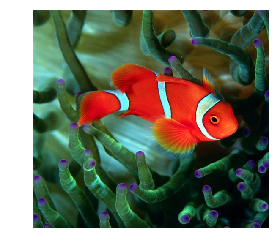

In [38]:
# We read a fish image here and display it
fish_image_url = "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/fish.png"
urllib.request.urlretrieve(fish_image_url, "fish.png") # downloads file as "fish.png"
im2 = cv2.imread("fish.png")
fish_im_corrected = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(fish_im_corrected)
print("Original size of fish image is: {} Kilo Bytes".format(str(math.ceil((os.stat('fish.png').st_size)/1000))))

Original size of the image is: 865 KB
Transformed image shape: [[33 58 32]
 [39 66 40]
 [36 63 37]
 ...
 [ 4  2  1]
 [ 4  2  1]
 [ 4  2  1]]
Compressed size of the image is: 98 KB


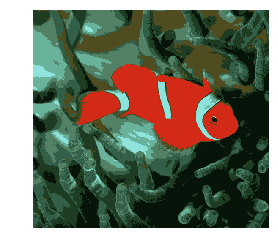

In [39]:
k_means_compress("fish.png", im2, 8)

#clusters: 5
Original size of the image is: 865 KB
Transformed image shape: [[33 58 32]
 [39 66 40]
 [36 63 37]
 ...
 [ 4  2  1]
 [ 4  2  1]
 [ 4  2  1]]
Compressed size of the image is: 64 KB
#clusters: 8
Original size of the image is: 865 KB
Transformed image shape: [[33 58 32]
 [39 66 40]
 [36 63 37]
 ...
 [ 4  2  1]
 [ 4  2  1]
 [ 4  2  1]]
Compressed size of the image is: 99 KB
#clusters: 11
Original size of the image is: 865 KB
Transformed image shape: [[33 58 32]
 [39 66 40]
 [36 63 37]
 ...
 [ 4  2  1]
 [ 4  2  1]
 [ 4  2  1]]
Compressed size of the image is: 119 KB
#clusters: 14
Original size of the image is: 865 KB
Transformed image shape: [[33 58 32]
 [39 66 40]
 [36 63 37]
 ...
 [ 4  2  1]
 [ 4  2  1]
 [ 4  2  1]]
Compressed size of the image is: 130 KB


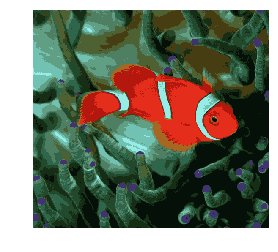

In [40]:
for i in range(0, 10):
    print("#clusters: {}".format(i))
    k_means_compress("fish.png", im2, i)

Exercise II

Original size of butterfly image is: 1008 Kilo Bytes


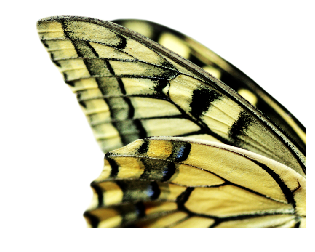

In [41]:
# We read a butterfly image here and display it
butterfly_image_url = "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/butterfly.png"
urllib.request.urlretrieve(butterfly_image_url, "butterfly.png") # downloads file as "butterfly.png"
im3 = cv2.imread("butterfly.png")
butterfly_im_corrected = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(butterfly_im_corrected)
print("Original size of butterfly image is: {} Kilo Bytes".format(str(math.ceil((os.stat('butterfly.png').st_size)/1000))))

Original size of the image is: 1008 KB
Transformed image shape: [[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [163 241 246]
 [159 241 247]
 [148 238 246]]
Compressed size of the image is: 90 KB


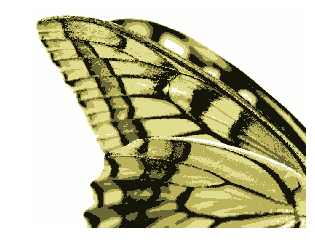

In [42]:
k_means_compress("butterfly.png", im3, 5)

Original size of the image is: 1008 KB
Transformed image shape: [[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [163 241 246]
 [159 241 247]
 [148 238 246]]
Compressed size of the image is: 31 KB


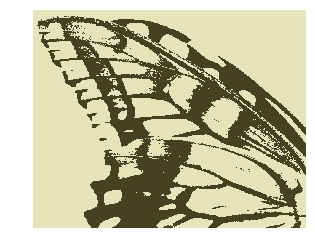

In [43]:
k_means_compress("butterfly.png", im3, 2)

Original size of the image is: 1008 KB
Transformed image shape: [[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [163 241 246]
 [159 241 247]
 [148 238 246]]
Compressed size of the image is: 245 KB


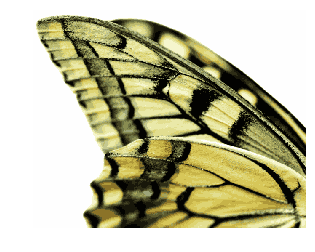

In [44]:
k_means_compress("butterfly.png", im3, 20)